# Explicación del Dataset y Propósito del Proyecto

## 1. Introducción
Este proyecto tiene como objetivo construir un modelo de clasificación de texto para identificar mensajes de correo electrónico como **spam** o **ham** (no spam). Utilizando técnicas de procesamiento de lenguaje natural (NLP), el proyecto busca construir un modelo robusto capaz de clasificar correos electrónicos de manera eficiente.

## 2. Dataset
El dataset utilizado en este proyecto contiene mensajes de texto etiquetados como **spam** o **ham**. La tarea consiste en entrenar un modelo para que pueda predecir la etiqueta (spam o ham) de un nuevo mensaje basándose en su contenido.

### Descripción del Dataset:
El dataset está compuesto por dos columnas:
- **Class**: La etiqueta del correo electrónico, que puede ser:
  - `ham`: Correo legítimo o no deseado.
  - `spam`: Correo no deseado o correo basura.
- **Message**: El cuerpo del mensaje de correo electrónico, que contiene el texto que será clasificado.

El dataset tiene un formato similar al siguiente:

| **Class** | **Message** |
|-----------|-------------|
| ham       | Go until jurong point, crazy.. Available only ... |
| ham       | Ok lar... Joking wif u oni... |
| spam      | Free entry in 2 a wkly comp to win FA Cup fina... |
| ham       | U dun say so early hor... U c already then say... |
| ham       | Nah I don't think he goes to usf, he lives aro... |

### Características:
- **Número de muestras**: Aproximadamente 5,000 correos electrónicos (ajusta según tu dataset).
- **Formato de los datos**:
  - **Clase**: Etiqueta que indica si el mensaje es spam o ham.
  - **Mensaje**: El texto del correo electrónico que se utilizará para la clasificación.

### Origen del Dataset:
Este dataset es un subconjunto del SMS Spam Collection Dataset, que es un conjunto de datos ampliamente utilizado para tareas de clasificación de texto y detección de spam.

## 3. Propósito del Proyecto
El propósito de este proyecto es construir un clasificador de texto que pueda identificar automáticamente si un mensaje es spam o ham. Este modelo será útil para mejorar los sistemas de filtrado de spam en correos electrónicos y otros sistemas de mensajes.

### Objetivos Específicos:
1. **Preprocesamiento de texto**: Limpiar y procesar los mensajes de texto, eliminando ruido (como símbolos innecesarios o palabras comunes) para mejorar el rendimiento del modelo.
2. **Entrenamiento de un modelo de clasificación**: Utilizar modelos avanzados como Transformers (por ejemplo, BERT) para entrenar el clasificador de spam.
3. **Evaluación del modelo**: Medir el rendimiento del modelo usando métricas como precisión, recall, y la matriz de confusión para evaluar su capacidad de clasificar correctamente los mensajes.
4. **Implementación de una solución real**: Utilizar el modelo entrenado para predecir si un nuevo mensaje de correo electrónico es spam o ham.

## 4. Impacto Esperado
El uso de modelos de clasificación automáticos para la detección de spam permitirá filtrar los correos electrónicos no deseados de manera más eficiente, lo que reducirá el tiempo y esfuerzo de los usuarios al revisar su bandeja de entrada. Además, esta tecnología puede ser aplicada en otros campos, como la clasificación de comentarios, la detección de fraude y la clasificación de contenido en redes sociales.

Este modelo puede ser el punto de partida para sistemas más avanzados de detección de spam en otras plataformas de comunicación, ayudando a mejorar la seguridad y la eficiencia de los usuarios.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()  # Sube aquí el archivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manugal","key":"d3d312bfa7349b7380be254e61c4bbd8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Descargar el dataset desde Kaggle
path = kagglehub.dataset_download("mariumfaheem666/spam-sms-classification-using-nlp")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mariumfaheem666/spam-sms-classification-using-nlp/versions/1


In [ ]:
!kaggle datasets download -d mariumfaheem666/spam-sms-classification-using-nlp -p /content
!unzip /content/spam-sms-classification-using-nlp.zip -d /content

Dataset URL: https://www.kaggle.com/datasets/mariumfaheem666/spam-sms-classification-using-nlp
License(s): apache-2.0
100% 209k/209k [00:00<00:00, 390kB/s]
100% 209k/209k [00:00<00:00, 390kB/s]
Archive:  /content/spam-sms-classification-using-nlp.zip
  inflating: /content/Spam_SMS.csv   


In [ ]:
import pandas as pd

# Cargar el archivo CSV con el ajuste de codificación y saltando la primera columna problemática
file_path = '/content/Spam_SMS.csv'  # Asegúrate de usar la ruta correcta
df = pd.read_csv(file_path, encoding='latin-1')

# Renombrar las columnas para que se vean correctamente
df.columns = ["Class", "Message"]

# Visualizar las primeras filas para confirmar
print(df.head())

  Class                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 2. Preprocesamiento de los datos

# Codificar las etiquetas (spam y ham)
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Dividir el conjunto de datos
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from transformers import BertTokenizer, BertModel

# Preparar el tokenizador con clean_up_tokenization_spaces establecido
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', clean_up_tokenization_spaces=True)

# El warning de este output no se puede modificar, solo es un aviso de que se esta tomando el tokenizador de un modelo preentrenado, se oculta por fines de formato

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from torch.utils.data import Dataset

# 4. Crear el Dataset personalizado

class CustomDataset(Dataset):
    def __init__(self, messages, labels, tokenizer, max_len):
        self.messages = messages
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.messages)

    def __getitem__(self, index):
        message = self.messages[index]
        label = self.labels[index]

        # Tokenizar y rellenar (padding)
        encoding = self.tokenizer.encode_plus(
            message,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def collate_fn(batch):
    return {
        'input_ids': torch.stack([item['input_ids'] for item in batch]),
        'attention_mask': torch.stack([item['attention_mask'] for item in batch]),
        'labels': torch.stack([item['labels'] for item in batch])
    }

In [ ]:
from torch.utils.data import DataLoader
# 5. Definir los parámetros
max_len = 128  # Tamaño reducido
batch_size = 32  # Ajusta según tu GPU

# Crear los DataLoader
train_dataset = CustomDataset(train_df['Message'].to_numpy(), train_df['Class'].to_numpy(), tokenizer, max_len)
test_dataset = CustomDataset(test_df['Message'].to_numpy(), test_df['Class'].to_numpy(), tokenizer, max_len)

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)

In [ ]:
import torch.nn as nn

# 6. Definir el modelo

class SpamClassifier(nn.Module):
    def __init__(self):
        super(SpamClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.bert.config.hidden_size, 2)  # 2 clases: spam y ham

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]  # Salida de la capa [CLS]
        pooled_output = self.dropout(pooled_output)
        return self.fc(pooled_output)

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

# 7. Entrenamiento del modelo

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpamClassifier().to(device)

# Definir la función de pérdida y el optimizador con una tasa de aprendizaje más alta
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

# Entrenamiento con Mixed Precision
scaler = torch.amp.GradScaler()  # Para mixed precision

# Funciones de entrenamiento y evaluación
def train_epoch(model, data_loader, loss_fn, optimizer, device, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        labels = d['labels'].to(device)

        # Usar la nueva sintaxis para autocast
        with torch.amp.autocast('cuda'):  # Cambiado aquí
            outputs = model(input_ids, attention_mask)
            loss = loss_fn(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # Cálculo de las predicciones y precisión
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

    # Calculamos precisión como proporción de aciertos
    accuracy = correct_predictions.double() / n_examples
    avg_loss = sum(losses) / len(losses)

    return accuracy, avg_loss

def evaluate_model(model, data_loader, loss_fn, device):
    model = model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            labels = d['labels'].to(device)

            # Sin autocast en evaluación
            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)

            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # Calculamos la media de la pérdida
    avg_loss = total_loss / len(data_loader)  # Promedio de la pérdida

    # Regresamos las etiquetas, predicciones y la pérdida promedio
    return all_labels, all_preds, avg_loss


In [ ]:
# 8. Entrenamiento
EPOCHS = 5  # Puedes ajustar el número de épocas
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    # Entrenamiento de una época
    train_acc, train_loss = train_epoch(
        model, train_loader, loss_fn, optimizer, device, len(train_dataset)
    )
    print(f'Train loss {train_loss} accuracy {train_acc}')

    # Evaluar el modelo, asegurándose de pasar el dispositivo
    val_labels, val_preds, val_loss = evaluate_model(
        model, test_loader, loss_fn, device  # Pasamos 'device' aquí
    )

    # Asegurarnos de que las predicciones y las etiquetas sean tensores de PyTorch
    val_preds = torch.tensor(val_preds)
    val_labels = torch.tensor(val_labels)

    # Calculamos la precisión comparando las predicciones con las etiquetas verdaderas
    val_acc = (val_preds == val_labels).sum().item() / len(val_labels)  # La precisión es el promedio de aciertos
    print(f'Validation loss {val_loss} accuracy {val_acc}')

Epoch 1/5
----------
Train loss 0.08670100597664714 accuracy 0.9717425431711146
Validation loss 0.026068109167473656 accuracy 0.9946188340807175
Epoch 2/5
----------
Train loss 0.02112508583647598 accuracy 0.9941690962099126
Validation loss 0.021645405259914697 accuracy 0.9955156950672646
Epoch 3/5
----------
Train loss 0.01789246590674988 accuracy 0.9948418928010765
Validation loss 0.021645405259914697 accuracy 0.9955156950672646
Epoch 4/5
----------
Train loss 0.017423535452689976 accuracy 0.9955146893922405
Validation loss 0.021645405259914697 accuracy 0.9955156950672646
Epoch 5/5
----------
Train loss 0.017918206485254422 accuracy 0.9957389549226284
Validation loss 0.021645405259914697 accuracy 0.9955156950672646


In [ ]:
# 9. Guardar el modelo entrenado
model_save_path = "spam_classifier_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Modelo guardado en {model_save_path}")

Modelo guardado en spam_classifier_model.pth


In [ ]:
# 10. Cargar el modelo para hacer predicciones
def load_model():
    model = SpamClassifier()
    model.load_state_dict(torch.load(model_save_path))
    model.to(device)  # Asegurar que el modelo esté en el dispositivo
    model.eval()
    return model

In [ ]:
# 11. Hacer una predicción
def predict_message(message, model, tokenizer, device):
    # Tokenizar y rellenar (padding)
    encoding = tokenizer.encode_plus(
        message,
        add_special_tokens=True,
        max_length=max_len,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Hacer la predicción
    with torch.no_grad():
        outputs = model(input_ids, attention_mask)
        _, predicted = torch.max(outputs, dim=1)

    # Convertir la predicción a etiqueta
    return 'ham' if predicted.item() == 0 else 'spam'

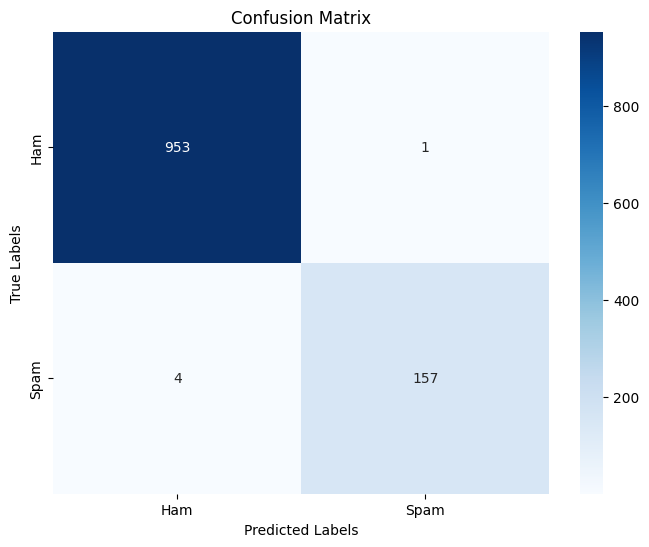

Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00       954
        Spam       0.99      0.98      0.98       161

    accuracy                           1.00      1115
   macro avg       0.99      0.99      0.99      1115
weighted avg       1.00      1.00      1.00      1115



In [ ]:
# 12. Evaluar el modelo en el conjunto de prueba
test_labels, test_preds, test_loss = evaluate_model(model, test_loader, loss_fn, device)  # Agregado 'loss_fn'

# 13. Generar la matriz de confusión
conf_matrix = confusion_matrix(test_labels, test_preds)

# 14. Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Reporte de clasificación
print("Classification Report:")
print(classification_report(test_labels, test_preds, target_names=['Ham', 'Spam']))


In [ ]:
# 15. Ejemplo de uso
message = "Esta muy padre programar un modelo Transformer"
prediction = predict_message(message, model, tokenizer, device)
print(f"The message is classified as: {prediction}")

The message is classified as: ham
